# **Exploratory Data Analysis**
Pada tahap ini kami melakukan EDA terhadap dataset yang telah dirubah tahunnya untuk menganalisis dan memvisualisasikan terkait dataset online retail agar dapat mengambil data yang dapat dijadikan acuan untuk membuat model RFM agar hasilnya relevan dengan use case.

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca dataset
df = pd.read_csv('online_retail1.csv')

In [3]:
# Menampilkan 5 data teratas
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2024-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.0,2024-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2024-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2024-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2024-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Menampilkan struktur dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254347 entries, 0 to 254346
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        254347 non-null  int64  
 1   InvoiceNo    254347 non-null  object 
 2   StockCode    254347 non-null  object 
 3   Description  253409 non-null  object 
 4   Quantity     254346 non-null  float64
 5   InvoiceDate  254346 non-null  object 
 6   UnitPrice    254346 non-null  float64
 7   CustomerID   181982 non-null  float64
 8   Country      254346 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 17.5+ MB


In [5]:
# Menampilkan struktur statistik deskriptif
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,254347.000000,254346.000000,254346.000000,181982.000000
mean,127173.000000,9.310203,5.047077,15286.335379
std,73423.798796,216.891875,116.621165,1728.542966
min,0.000000,-74215.000000,0.000000,12346.000000
25%,63586.500000,1.000000,1.250000,13849.000000
50%,127173.000000,3.000000,2.100000,15159.000000
75%,190759.500000,10.000000,4.150000,16838.000000
max,254346.000000,74215.000000,38970.000000,18287.000000


In [6]:
# Menampilkan data yang hilang
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,938
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,72365
Country,1


In [7]:
# Menghitung banyaknya data yang duplikat
df.duplicated().sum()

np.int64(0)

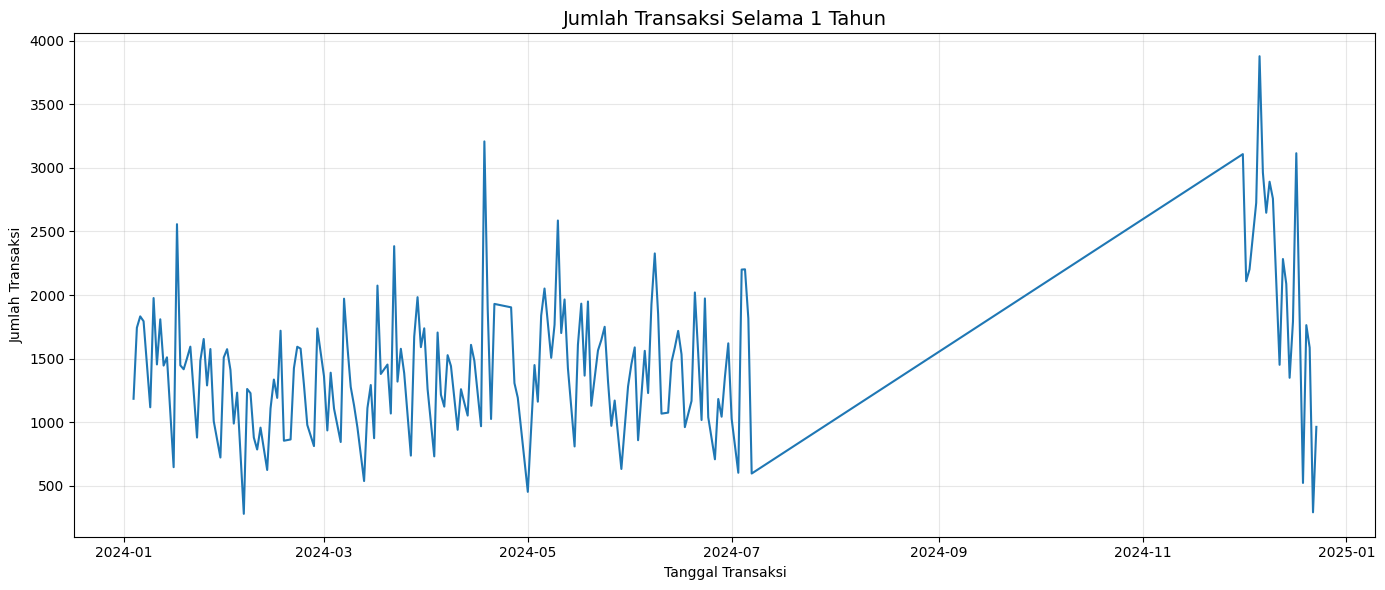

In [8]:
# Menampilkan visualisasi data jumlah transaksi selama 1 tahun

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceDay'] = df['InvoiceDate'].dt.date
daily = df.groupby('InvoiceDay').size()

plt.figure(figsize=(14, 6))
plt.plot(daily.index, daily.values, linewidth=1.5)
plt.title("Jumlah Transaksi Selama 1 Tahun", fontsize=14)
plt.xlabel("Tanggal Transaksi")
plt.ylabel("Jumlah Transaksi")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# **Jumlah Transaksi Dalam 1 Tahun**
Hasil eksplorasi diatas dapat disimpulkan bahwa jumlah transaksi mengalami peningkatan signifikan dari sekitar 1000 transaksi pada awal tahun lalu mencapai puncak 4000 transaksi di akhir tahun. Meskipun terdapat fluktuasi yang cukup tinggi di awal tahun dalam kurun harian atau mingguan, namun pada awal pulan desember terjadi lonjakan tinggi dan mengalami penurunan tajam kembali di akhir desember 2024. Puncak tertinggi berada di awal bulan desember dan puncak terendah di akhir bulan desember.

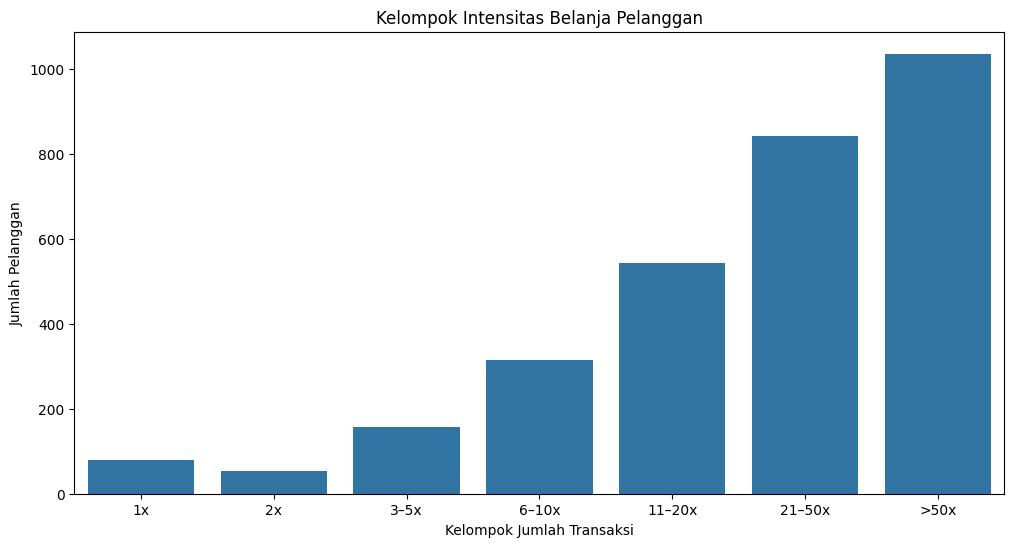

In [9]:
# Menampilkan histogram sebaran pelanggan berdasarkan intensitas belanja

freq = df["CustomerID"].value_counts()
bins = [1, 2, 5, 10, 20, 50, 100]
labels = ['1x', '2x', '3–5x', '6–10x', '11–20x', '21–50x', '>50x']
freq_grouped = pd.cut(freq, bins=[0,1,2,5,10,20,50,999], labels=labels, right=True)
count_grouped = freq_grouped.value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=count_grouped.index, y=count_grouped.values)
plt.title("Kelompok Intensitas Belanja Pelanggan")
plt.xlabel("Kelompok Jumlah Transaksi")
plt.ylabel("Jumlah Pelanggan")
plt.show()


# **Sebaran Pelanggan Berdasarkan Intensitas Belanja**
Berdasarkan histogram diatas menunjukan bahwa lebih dari 1000 oelanggan hanya melakukan 1 kali transaksi. Selanjutnya, jumlah pelanggan menurun drastis hingga hanya sekitar 400 pelanggan yang transaksi 2 kali dan jumlah pelanggan terus menurun hingga 51 kali transaksi. Hal ini menunjukan bahwa meskipun perusahaan memiliki beberapa pelanggan yang langganan cukup namun kebanyakan dari pelanggan merupakan pelanggan sekali beli.

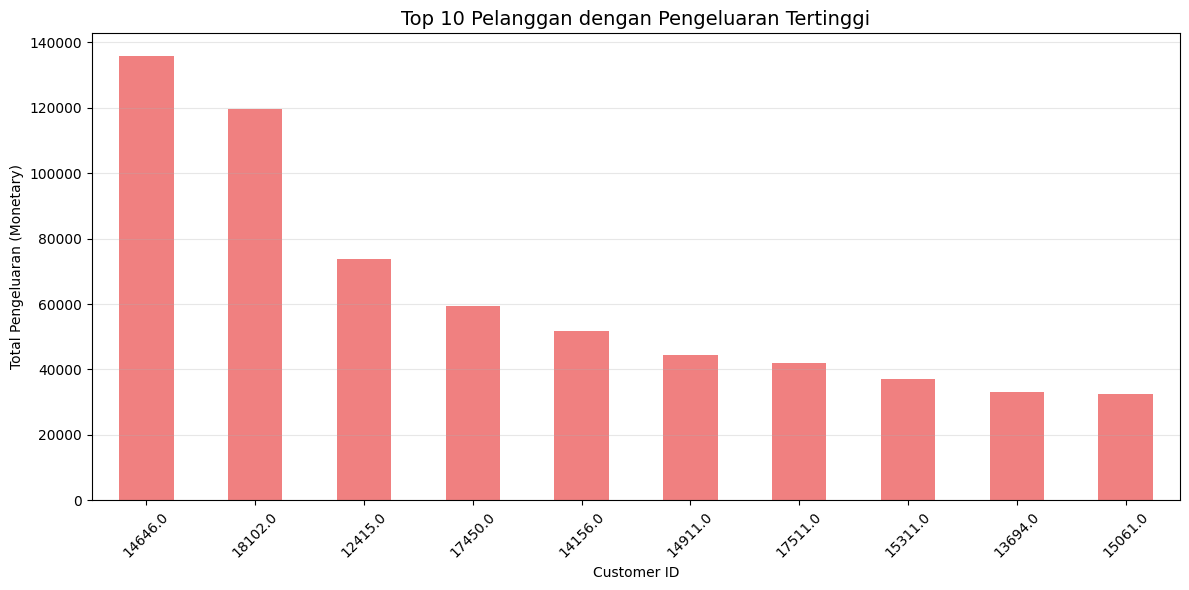

In [10]:
# Menampilkan ID customer dengan top 10 pelanggan dengan pengeluaran tertinggi

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
top10_monetary = monetary.head(10)

plt.figure(figsize=(12,6))
top10_monetary.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Pelanggan dengan Pengeluaran Tertinggi', fontsize=14)
plt.xlabel('Customer ID')
plt.ylabel('Total Pengeluaran (Monetary)')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Top 10 Pelanggan dengan Pengeluaran Tertinggi**
Histogram diatas menampilakan Top 10 ID Customer dengan jumlah transaksi yang tinggi. Hal ini dapat dijadikan acuan untuk menganalisis tingat loyalitas pelanggan bagi perusahaan.

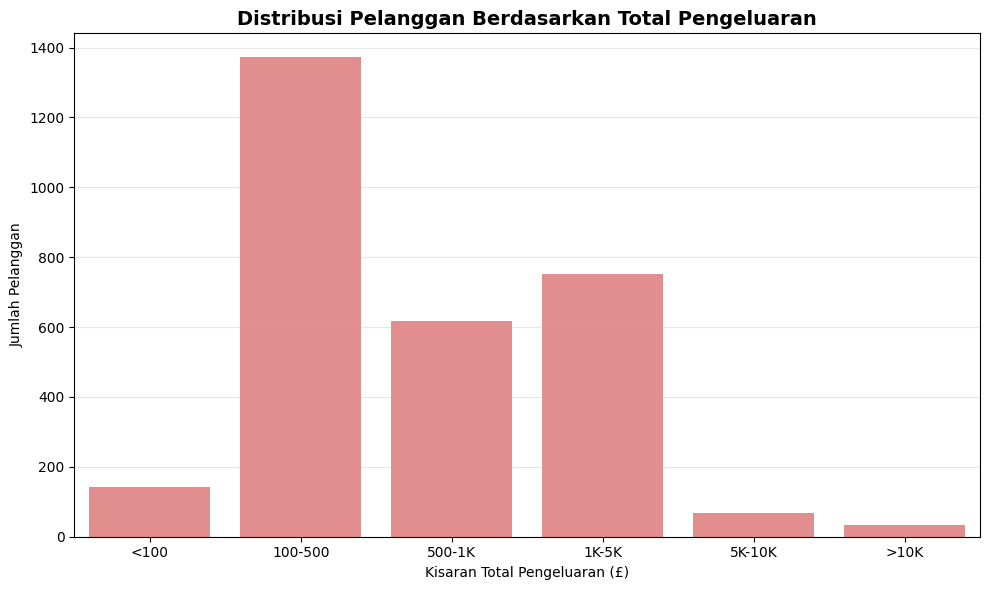

In [11]:
# Menampilkan distribusi pelanggan berdasarkan total pengeluaran

bins = [0, 100, 500, 1000, 5000, 10000, monetary.max()]
labels = ['<100', '100-500', '500-1K', '1K-5K', '5K-10K', '>10K']
monetary_bins = pd.cut(monetary, bins=bins, labels=labels)
monetary_dist = monetary_bins.value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=monetary_dist.index, y=monetary_dist.values, color='lightcoral')
plt.title('Distribusi Pelanggan Berdasarkan Total Pengeluaran', fontsize=14, weight='bold')
plt.xlabel('Kisaran Total Pengeluaran (£)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **Distribusi Pelanggan Berdasarkan Total Pengeluaran'**
Histogram diatas menampilkan bahwa kebanyakan pelanggan melakukan transaksi dengan nominal yang rendah hingga menengah dan sedikit sekali pelanggan yang melakukan transaksi lebih dari $5.000. Hal ini dapat disimpulkan bahwa pelanggan melakukan transaksi yang relatif kecil.